<a href="https://colab.research.google.com/github/GJ-007-sage/Astronomy/blob/main/Python_question_24b1809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files

In [51]:
# Step 2: Upload the data.csv file from your Downloads folder
uploaded = files.upload()  # This will prompt you to upload data.csv

Saving Data.csv to Data (6).csv


In [52]:
data = pd.read_csv('Data.csv')  # Load the uploaded file

In [54]:
# Step 3: Inspect the data
print("Data shape:", data.shape)
print(data.head())

Data shape: (1000, 21)
         x       y_0       y_1       y_2       y_3       y_4       y_5  \
0  0.00000  0.989980  0.998459  1.001068  1.066676  0.997943  0.995089   
1  0.01001  0.990887  0.992327  0.988872  1.067868  0.981974  1.004034   
2  0.02002  0.999041  0.993875  1.004560  1.075824  1.010510  0.996605   
3  0.03003  0.989734  1.005898  0.995402  1.055772  1.009313  1.010454   
4  0.04004  0.998176  1.007429  1.005067  1.060229  0.999561  0.998571   

        y_6       y_7       y_8  ...      y_10      y_11      y_12      y_13  \
0  1.010068  1.009982  1.017102  ...  0.999973  0.999646  0.997508  1.000148   
1  0.997383  0.995703  1.013130  ...  1.006460  1.006806  0.994901  0.983236   
2  1.002234  1.001129  1.011958  ...  0.984904  1.000970  0.988068  1.005503   
3  0.991263  1.015412  0.997967  ...  1.017996  1.010037  0.998273  0.975919   
4  0.996269  0.990740  1.005408  ...  1.016328  1.013465  1.000915  0.987520   

       y_14      y_15      y_16      y_17      y_18

In [55]:
# Step 4: Prepare the data for clustering
# First column is time (x-coordinate), columns 2-21 are the 20 observations
time = data.iloc[:, 0]  # X-coordinate (time)
observations = data.iloc[:, 1:]  # 20 observation columns

In [56]:
# Step 5: Calculate features for each observation
num_obs = observations.shape[1]
peakiness = np.zeros(num_obs)
dippiness = np.zeros(num_obs)

for i in range(num_obs):
    obs_data = observations.iloc[:, i].values
    mean_val = np.mean(obs_data)
    max_val = np.max(obs_data)
    min_val = np.min(obs_data)
    peakiness[i] = (max_val - mean_val) / mean_val
    dippiness[i] = (mean_val - min_val) / mean_val

# Step 6: Classify based on thresholds
# Heuristic: Peakiness > 0.05 and Dippiness < 0.1 for Raghav (0), else Vishwaajith (1)
threshold_peak = 0.05
threshold_dip = 0.1
final_labels = np.where((peakiness > threshold_peak) & (dippiness < threshold_dip), 0, 1)

# Step 7: Output the classifications
print("observation  y_i    peakiness  dippiness  1/0")
print("-" * 50)
for i, label in enumerate(final_labels):
      obs_num = i + 1  # Observation number (1 to 20)
      y_i = f"y_{i}"   # y_i column name
      pk = peakiness[i]
      dp = dippiness[i]
      print(f"{obs_num:11} {y_i:5}  {pk:9.3f}  {dp:9.3f}  {label}")



observation  y_i    peakiness  dippiness  1/0
--------------------------------------------------
          1 y_0        0.077      0.038  0
          2 y_1        0.041      0.146  1
          3 y_2        0.051      0.047  0
          4 y_3        0.069      0.065  0
          5 y_4        0.091      0.045  0
          6 y_5        0.040      0.138  1
          7 y_6        0.043      0.139  1
          8 y_7        0.081      0.047  0
          9 y_8        0.042      0.117  1
         10 y_9        0.049      0.134  1
         11 y_10       0.039      0.153  1
         12 y_11       0.039      0.135  1
         13 y_12       0.037      0.126  1
         14 y_13       0.081      0.045  0
         15 y_14       0.055      0.049  0
         16 y_15       0.071      0.043  0
         17 y_16       0.077      0.068  0
         18 y_17       0.056      0.043  0
         19 y_18       0.035      0.127  1
         20 y_19       0.038      0.113  1


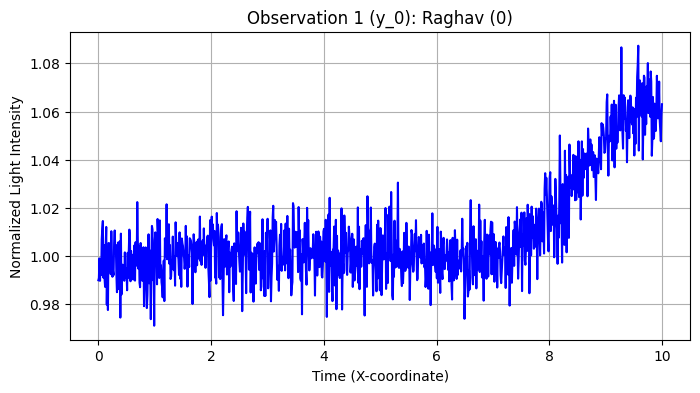

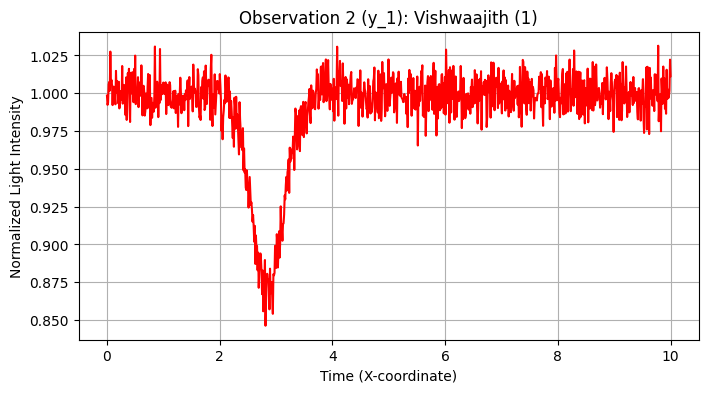

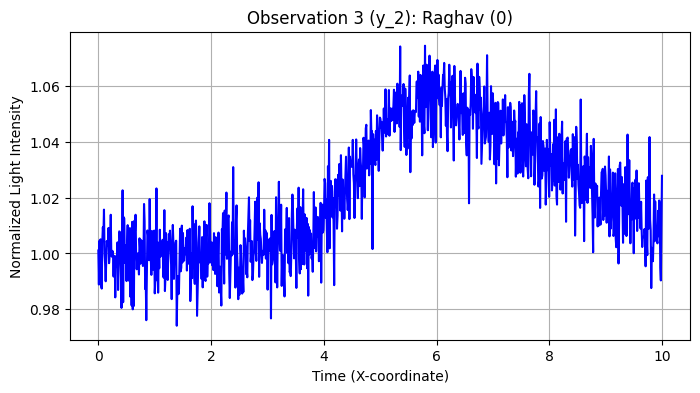

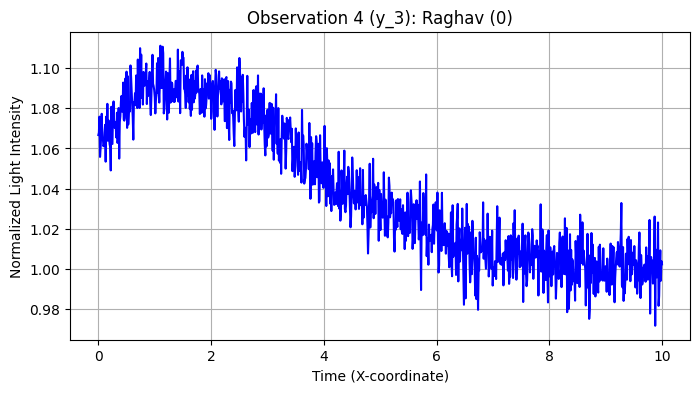

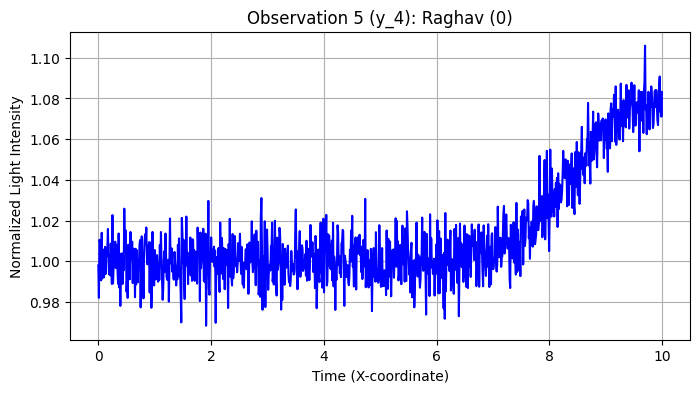

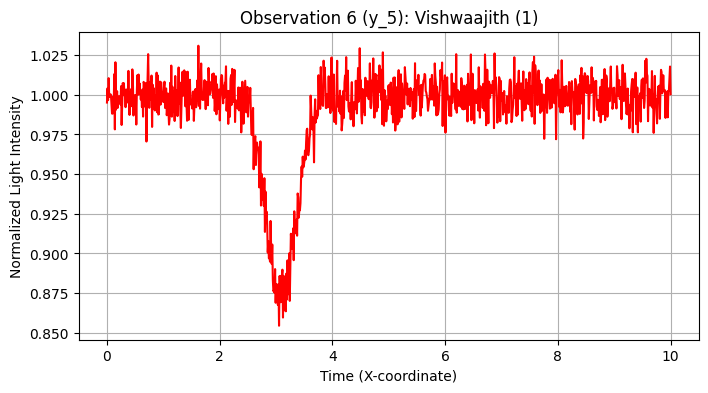

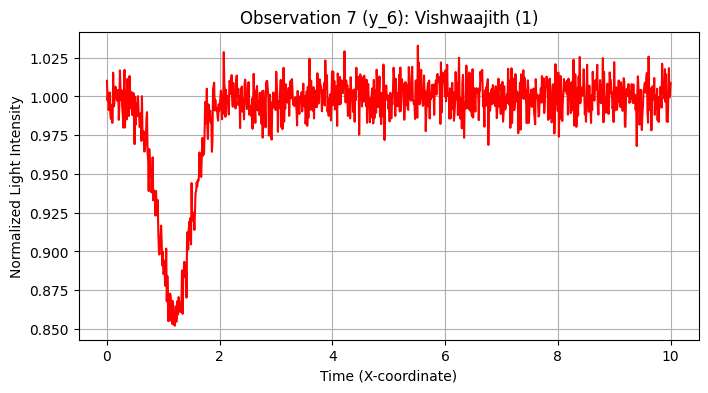

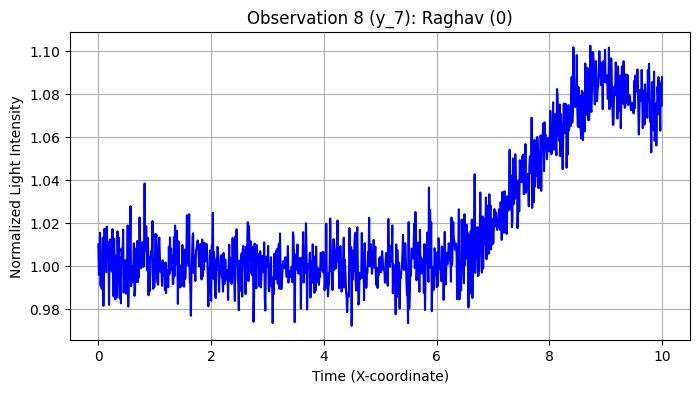

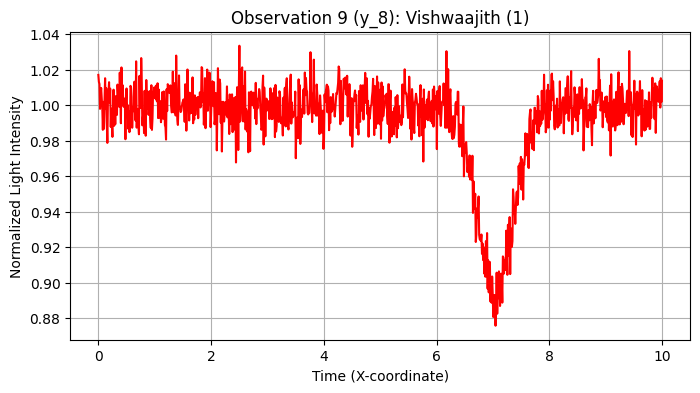

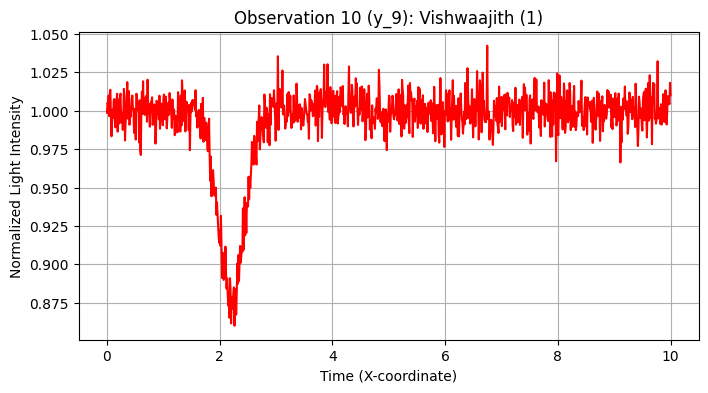

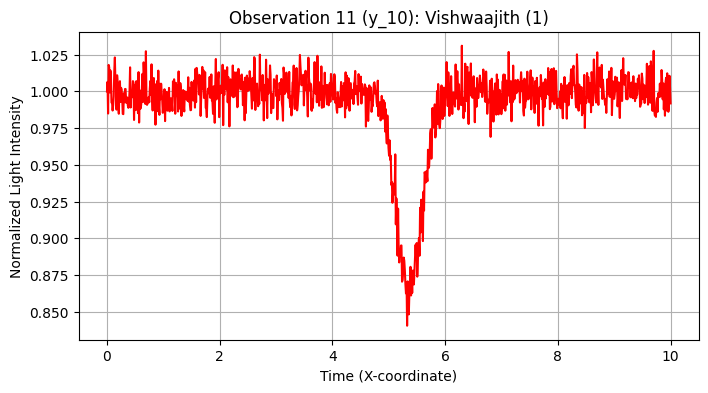

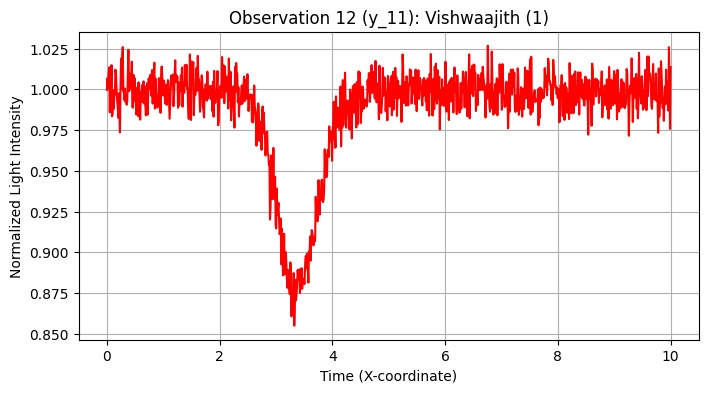

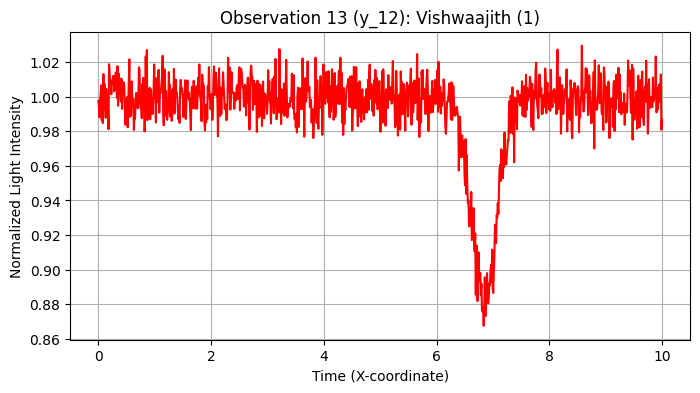

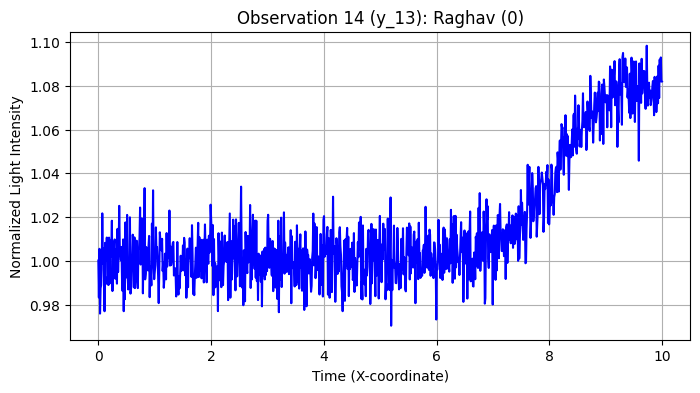

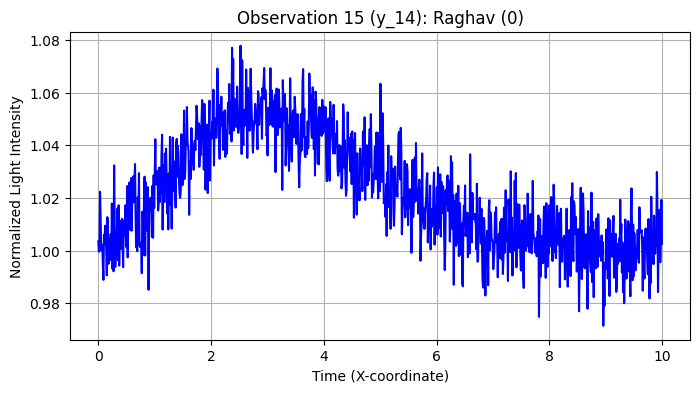

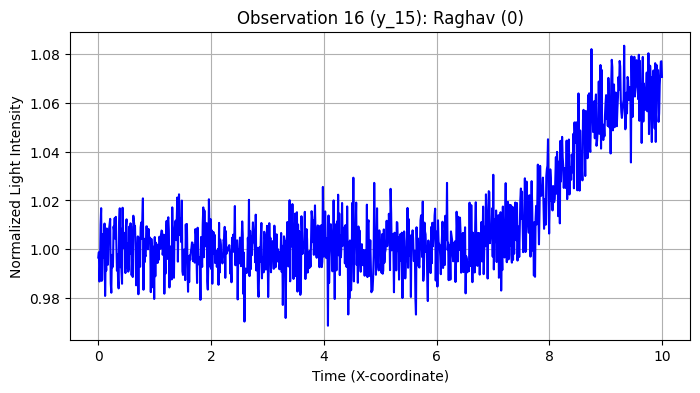

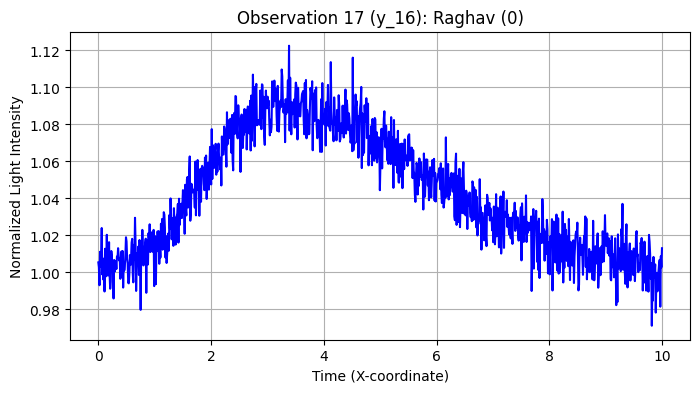

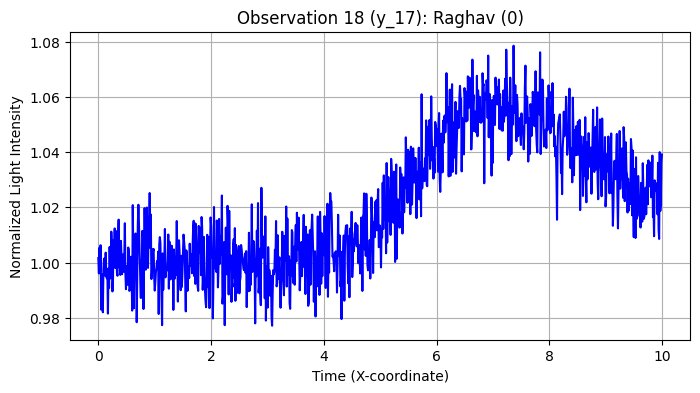

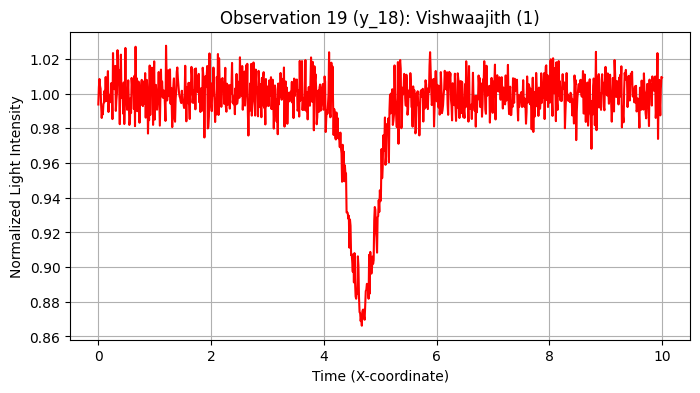

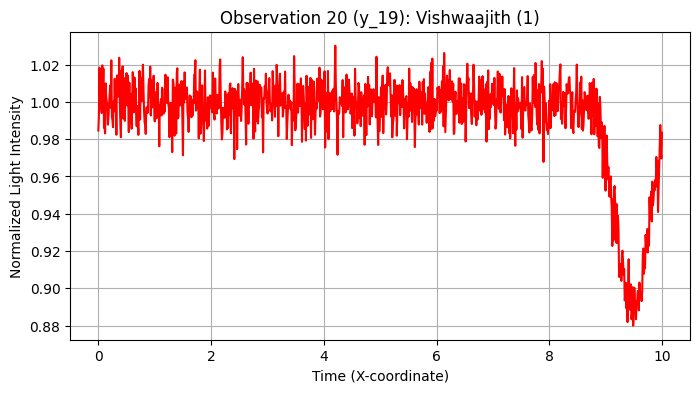

In [58]:
# Step 8: Generate separate graphs for all 20 observations
for i in range(num_obs):
    plt.figure(figsize=(8, 4))
    plt.plot(time, observations.iloc[:, i], color='blue' if final_labels[i] == 0 else 'red')
    plt.title(f"Observation {i + 1} (y_{i}): {'Raghav (0)' if final_labels[i] == 0 else 'Vishwaajith (1)'}")
    plt.xlabel("Time (X-coordinate)")
    plt.ylabel("Normalized Light Intensity")
    plt.grid(True)
    plt.show()